In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import scipy.io as sp
import matplotlib.transforms as transforms

# Load Data

In [2]:
pred = ["P(A1)", "P(A2)", "P(A3)", "P(¬A1)", "P(¬A2)", "P(¬A3)",
       "P(A2|A1)","P(A2|¬A1)","P(¬A2|A1)","P(¬A2|¬A1)", 
        "P(A1 ∩ A2)", "P(A1 ∩ ¬A2)","P(¬A1 ∩ A2)","P(¬A1 ∩ ¬A2)", 
        "P(A1 ∪ A2)", "P(A1 ∪ ¬A2)", "P(¬A1 ∪ A2)", "P(¬A1 ∪ ¬A2)", 
        "P(A3|A2)", "P(A3|¬A2)", "P(¬A3|A2)", "P(¬A3|¬A2)",
        "P(A2 ∩ A3)", "P(A2 ∩ ¬A3)", "P(¬A2 ∩ A3)","P(¬A2 ∩ ¬A3)", 
       "P(A2 ∪ A3)", "P(A2 ∪ ¬A3)", "P(¬A2 ∪ A3)", "P(¬A2 ∪ ¬A3)", 
        "P(A1|A3)", "P(A1|¬A3)", "P(¬A1|A3)", "P(¬A1|¬A3)",
       "P(A3 ∩ A1)", "P(A3 ∩ ¬A1)", "P(¬A3 ∩ A1)", "P(¬A3 ∩ ¬A1)", 
        "P(A3 ∪ A1)", "P(A3 ∪ ¬A1)", "P(¬A3 ∪ A1)", "P(¬A3 ∪ ¬A1)", 
        "P(A1|A2)", "P(¬A1|A2)", "P(A1|¬A2)", "P(¬A1|¬A2)", 
       "P(A2 ∩ A1)", "P(¬A2 ∩ A1)", "P(A2 ∩ ¬A1)", "P(¬A2 ∩ ¬A1)", 
        "P(A2 ∪ A1)", "P(¬A2 ∪ A1)", "P(A2 ∪ ¬A1)", "P(¬A2 ∪ ¬A1)", 
        "P(A2|A3)", "P(¬A2|A3)", "P(A2|¬A3)", "P(¬A2|¬A3)", 
        "P(A3 ∩ A2)", "P(¬A3 ∩ A2)", "P(A3 ∩ ¬A2)", "P(¬A3 ∩ ¬A2)",
       "P(A3 ∪ A2)", "P(¬A3 ∪ A2)", "P(A3 ∪ ¬A2)", "P(¬A3 ∪ ¬A2)", "P(A3|A1)", "P(¬A3|A1)", "P(A3|¬A1)", 
        "P(¬A3|¬A1)", "P(A1 ∩ A3)", "P(¬A1 ∩ A3)", "P(A1 ∩ ¬A3)", "P(¬A1 ∩ ¬A3)", 
       "P(A1 ∪ A3)", "P(¬A1 ∪ A3)", "P(A1 ∪ ¬A3)", "P(¬A1 ∪ ¬A3)"]

In [3]:
pred_new = []
for p in pred:
    p = p.replace("A1","A")
    p = p.replace("A2","B")
    p = p.replace("A3","C")
    p = p.replace("P(","")
    p = p.replace(")","")
    pred_new.append(p)
pred = pred_new

In [4]:
mean_tab = pd.read_csv("mean_tab.csv", index_col = "Unnamed: 0")
mean_tab

,subject,rating,type,pred,pair
0,0,50.000000,data,A,A1_A2
1,0,28.485239,BS,A,A1_A2
2,0,21.024456,QSS,A,A1_A2
3,0,20.978076,CSS,A,A1_A2
4,0,28.201033,RF,A,A1_A2
...,...,...,...,...,...
488035,1161,65.000000,data,¬A ∪ ¬C,B1_B3
488036,1161,54.527864,BS,¬A ∪ ¬C,B1_B3
488037,1161,68.603178,QSS,¬A ∪ ¬C,B1_B3
488038,1161,67.710146,CSS,¬A ∪ ¬C,B1_B3


# Make Violin Plots

In [5]:
violin_plot_tab = {"tab":{}}

In [6]:
for pair in mean_tab["pair"].unique():
    violin_plot_tab["tab"][pair] = {}
    model_tab = mean_tab[mean_tab["pair"] == pair]
    for m in mean_tab["type"].unique():
        for n in mean_tab["type"].unique():
            if n != "data" and n != m:
                model_tab = model_tab[model_tab["type"] != n]
        violin_plot_tab["tab"][pair][m] = model_tab
        model_tab = mean_tab[mean_tab["pair"] == pair]

In [7]:
violin_plot_tab["tab"]["A1_A2"]["BS"]

,subject,rating,type,pred,pair
0,0,50.000000,data,A,A1_A2
1,0,28.485239,BS,A,A1_A2
10,0,44.000000,data,B,A1_A2
11,0,29.602571,BS,B,A1_A2
30,0,71.000000,data,¬A,A1_A2
...,...,...,...,...,...
245566,584,62.573011,BS,¬B ∪ A,A1_A2
245570,584,49.000000,data,B ∪ ¬A,A1_A2
245571,584,57.129067,BS,B ∪ ¬A,A1_A2
245575,584,53.000000,data,¬B ∪ ¬A,A1_A2


## Bayesian Sampler

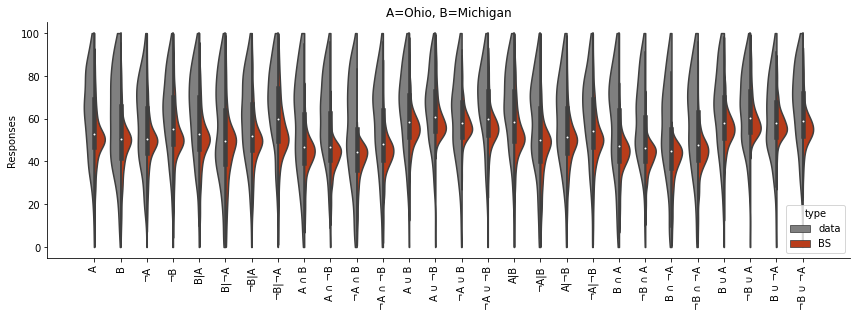

In [8]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["A1_A2"]["BS"], 
                        palette=["tab:grey",(210/255, 45/255, 0/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.title("A=Ohio, B=Michigan")
plt.xlabel("")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_A1_A2_BS.jpg", dpi = 500)

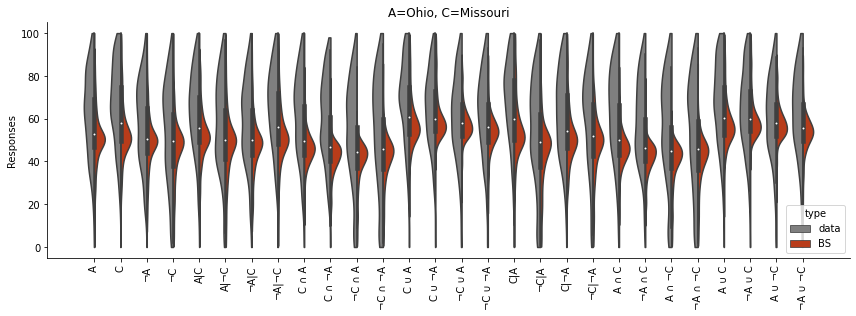

In [9]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["A1_A3"]["BS"], 
                        palette=["tab:grey",(210/255, 45/255, 0/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.title("A=Ohio, C=Missouri")
plt.xlabel("")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_A1_A3_BS.jpg", dpi = 500)

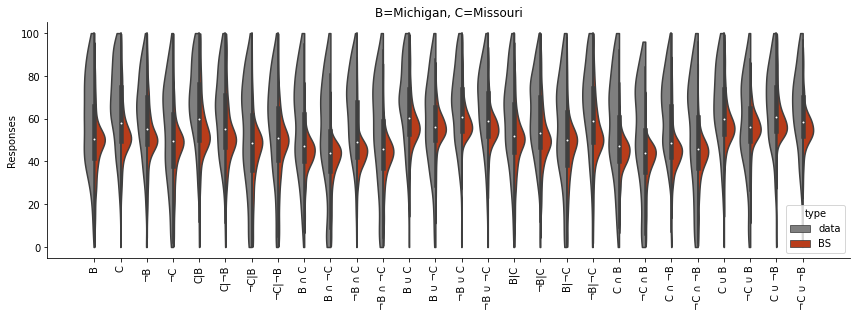

In [10]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["A2_A3"]["BS"], 
                        palette=["tab:grey",(210/255, 45/255, 0/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.title("B=Michigan, C=Missouri")
plt.xlabel("")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_A2_A3_BS.jpg", dpi = 500)

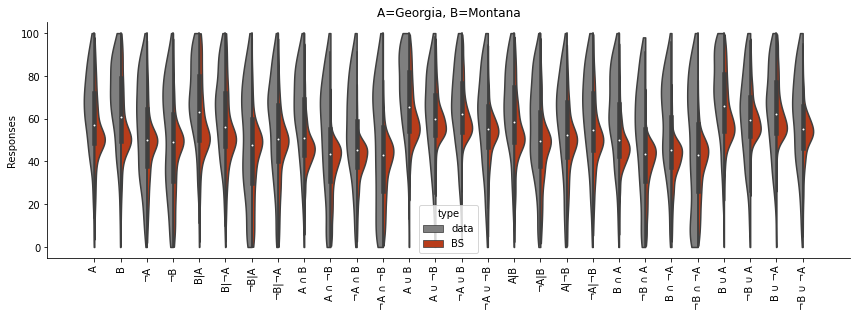

In [11]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["B1_B2"]["BS"], 
                        palette=["tab:grey",(210/255, 45/255, 0/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.title("A=Georgia, B=Montana")
plt.xlabel("")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_B1_B2_BS.jpg", dpi = 500)

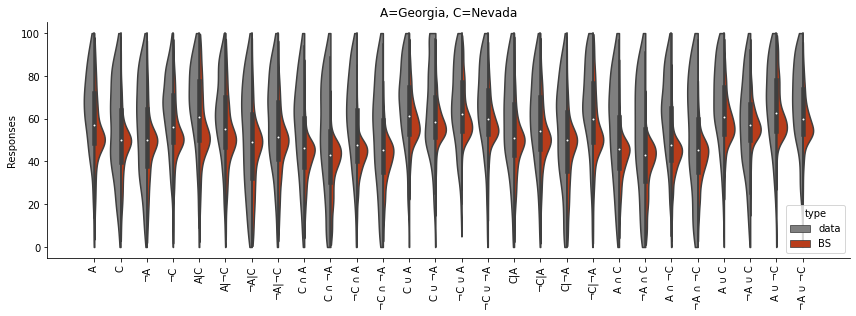

In [12]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["B1_B3"]["BS"], 
                        palette=["tab:grey",(210/255, 45/255, 0/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.title("A=Georgia, C=Nevada")
plt.xlabel("")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_B1_B3_BS.jpg", dpi = 500)

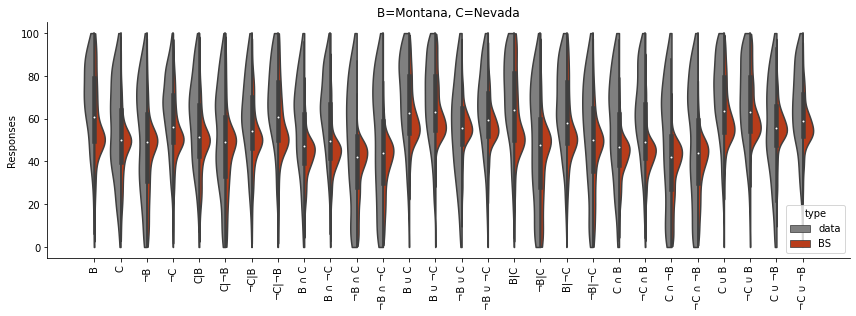

In [13]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["B2_B3"]["BS"], 
                        palette=["tab:grey",(210/255, 45/255, 0/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.title("B=Montana, C=Nevada")
plt.xlabel("")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_B2_B3_BS.jpg", dpi = 500)

## Quantum Sequential Sampler

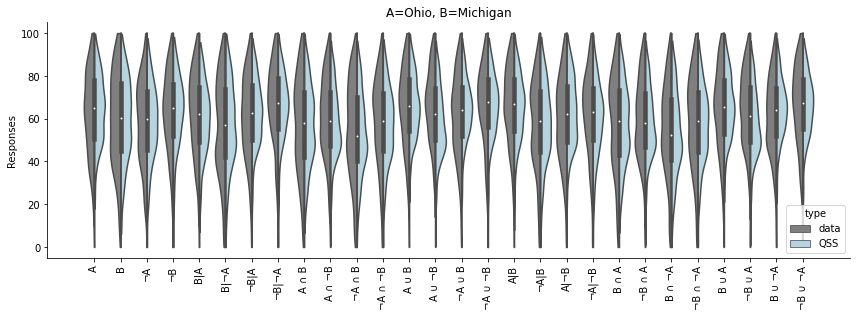

In [14]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["A1_A2"]["QSS"], 
                        palette=["tab:grey",(173/255, 216/255, 230/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("A=Ohio, B=Michigan")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_A1_A2_QSS.jpg", dpi = 500)

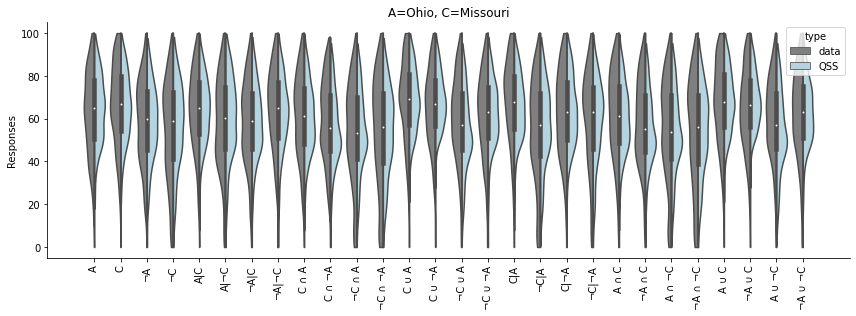

In [15]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["A1_A3"]["QSS"], 
                        palette=["tab:grey",(173/255, 216/255, 230/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("A=Ohio, C=Missouri")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_A1_A3_QSS.jpg", dpi = 500)

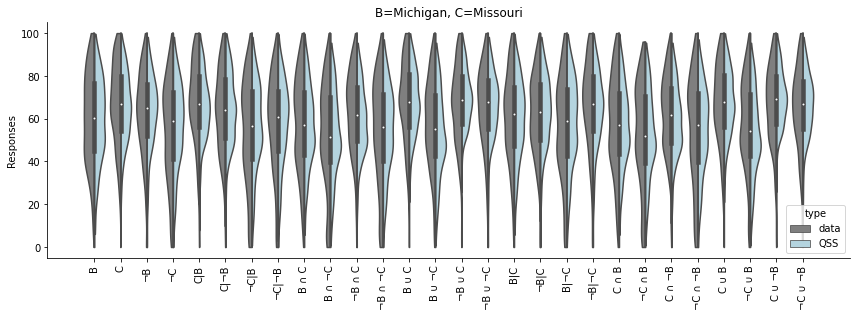

In [16]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["A2_A3"]["QSS"], 
                        palette=["tab:grey",(173/255, 216/255, 230/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("B=Michigan, C=Missouri")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_A2_A3_QSS.jpg", dpi = 500)

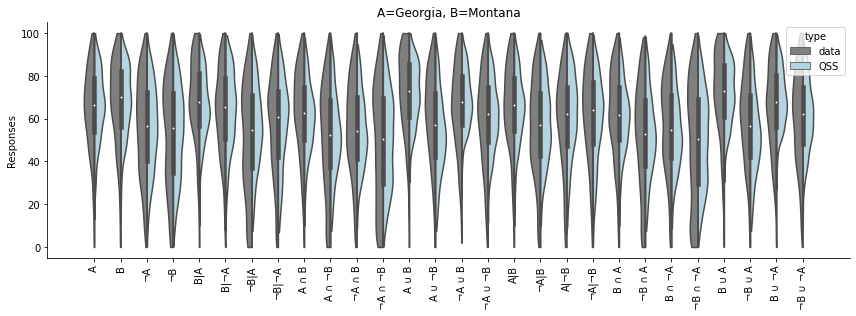

In [17]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["B1_B2"]["QSS"], 
                        palette=["tab:grey",(173/255, 216/255, 230/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("A=Georgia, B=Montana")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_B1_B2_QSS.jpg", dpi = 500)

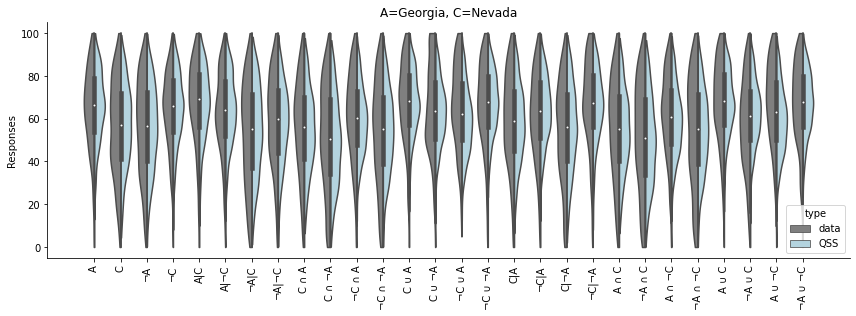

In [18]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["B1_B3"]["QSS"], 
                        palette=["tab:grey",(173/255, 216/255, 230/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("A=Georgia, C=Nevada")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_B1_B3_QSS.jpg", dpi = 500)

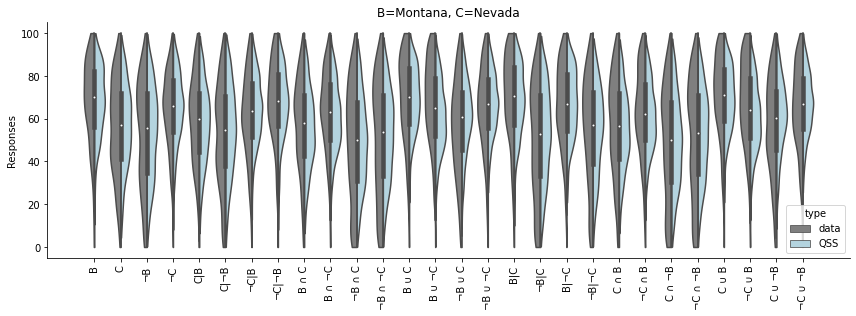

In [19]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["B2_B3"]["QSS"], 
                        palette=["tab:grey",(173/255, 216/255, 230/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("B=Montana, C=Nevada")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_B2_B3_QSS.jpg", dpi = 500)

## Classical Sequential Sampler

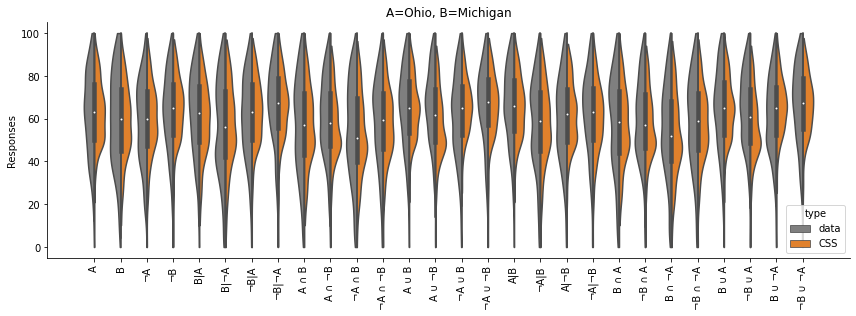

In [20]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["A1_A2"]["CSS"], 
                        palette=["tab:grey","tab:orange"], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("A=Ohio, B=Michigan")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_A1_A2_CSS.jpg", dpi = 500)

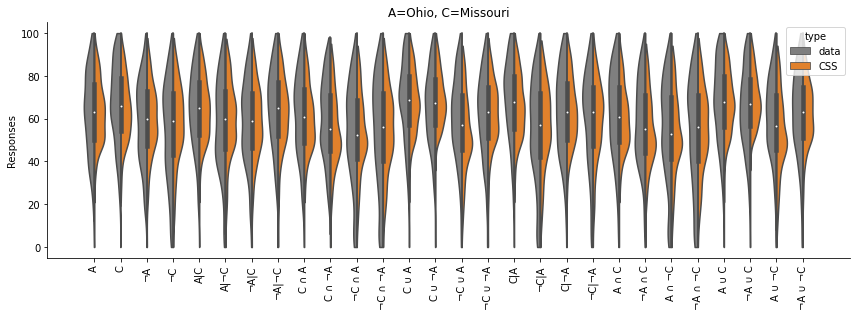

In [21]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["A1_A3"]["CSS"], 
                        palette=["tab:grey","tab:orange"], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("A=Ohio, C=Missouri")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_A1_A3_CSS.jpg", dpi = 500)

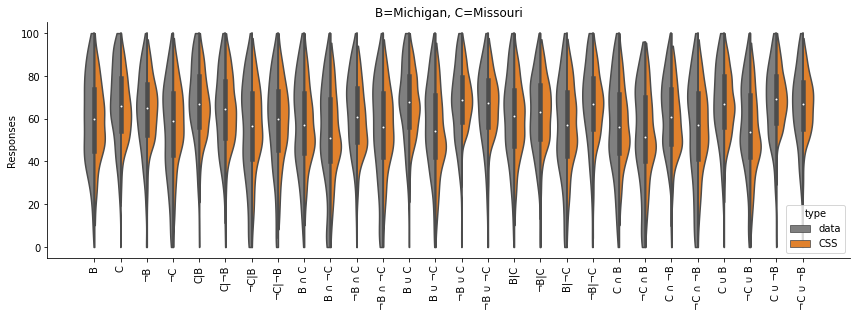

In [22]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["A2_A3"]["CSS"], 
                        palette=["tab:grey","tab:orange"], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("B=Michigan, C=Missouri")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_A2_A3_CSS.jpg", dpi = 500)

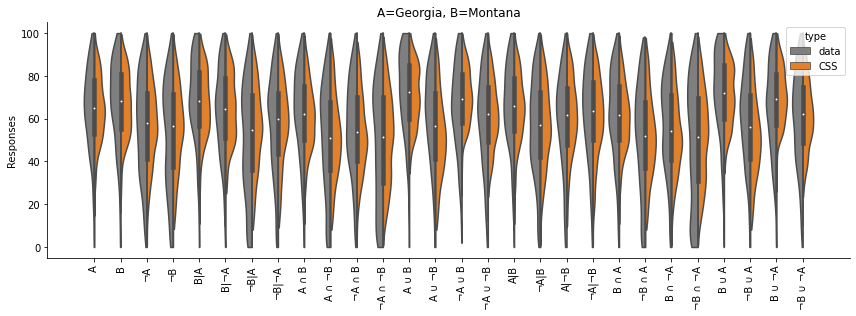

In [23]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["B1_B2"]["CSS"], 
                        palette=["tab:grey","tab:orange"], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("A=Georgia, B=Montana")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_B1_B2_CSS.jpg", dpi = 500)

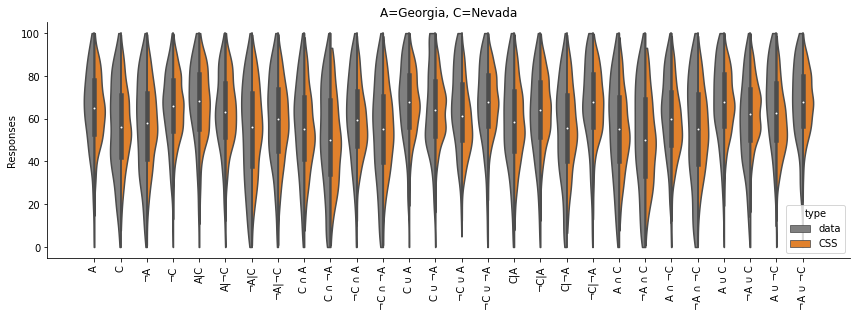

In [24]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["B1_B3"]["CSS"], 
                        palette=["tab:grey","tab:orange"], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("A=Georgia, C=Nevada")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_B1_B3_CSS.jpg", dpi = 500)

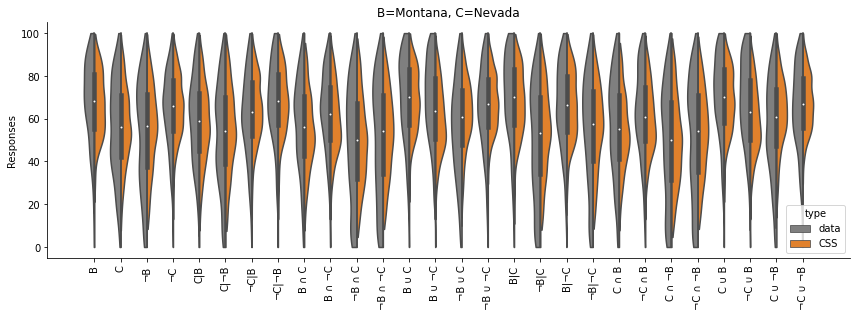

In [25]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=violin_plot_tab["tab"]["B2_B3"]["CSS"], 
                        palette=["tab:grey","tab:orange"], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("B=Montana, C=Nevada")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("violin_B2_B3_CSS.jpg", dpi = 500)

# CogSci Proceeding Plot

In [26]:
pred_list = violin_plot_tab["tab"]["A1_A2"]["BS"]["pred"].unique()
in_list = ["A", "B", "B|¬A", "¬A|¬B", "A ∩ B", '¬A ∩ ¬B', '¬B ∪ ¬A', 'A ∪ B']
exclusion_list = []
for p in pred_list:
    if p not in in_list:
        exclusion_list.append(p)

In [27]:
def cogsci_plot(tab, exclusion_list):
    for p in exclusion_list:
        tab = tab[tab["pred"] != p]
    return tab

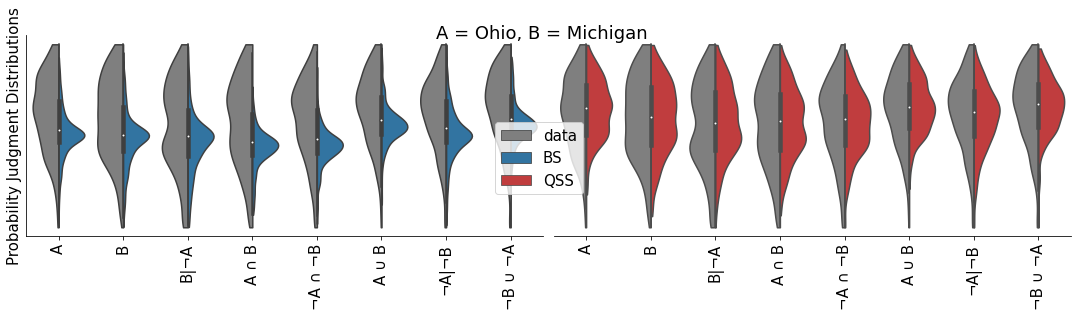

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15,4), sharey=True)
plt.rcParams["figure.figsize"] = (20,12)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=cogsci_plot(violin_plot_tab["tab"]["A1_A2"]["BS"],exclusion_list), 
                        palette=["tab:grey","tab:blue"], split=True, scale="count", cut = 0, ax = axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation = 90)
axs[0].set_ylim(-5,105)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=cogsci_plot(violin_plot_tab["tab"]["A1_A2"]["QSS"],exclusion_list), 
                        palette=["tab:grey","tab:red"], split=True, scale="count", cut = 0, ax = axs[1])
axs[1].set_ylim(-5,105)
axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation = 90)
# plt.xticks(rotation = 90)
# plt.grid()
plt.subplots_adjust(bottom=0.22)
axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)
axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)
axs[1].spines["left"].set_visible(False)
axs[1].set_yticks([])
axs[1].set_ylabel("")
plt.tight_layout()
handles0, labels0 = axs[0].get_legend_handles_labels()
handles1, labels1 = axs[1].get_legend_handles_labels()
handles = [handles0[0], handles0[1], handles1[1]]
labels = [labels0[0], labels0[1], labels1[1]]
fig.legend(handles, labels, loc='center', fontsize = 15)
axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[0].set_xlabel("")
axs[1].set_xlabel("")
axs[0].set_ylabel("Probability Judgment Distributions",fontsize = 15)
# fig.subplots_adjust(top=0.7)
axs[0].set_xticklabels(labels = axs[0].get_xticklabels(),fontsize = 15)
axs[1].set_xticklabels(labels = axs[1].get_xticklabels(),fontsize = 15)
fig.suptitle("A = Ohio, B = Michigan", size = 18, y = 1)
plt.savefig("violin_A1A2_cogsci.jpg", bbox_inches='tight', dpi = 500)

## Two sigma participants

In [29]:
two_sig_p = sp.loadmat("2sig_participant.mat")['participant_list'][0: 1162,:]
two_sig_p = two_sig_p.flatten()
two_sig_p = np.subtract(two_sig_p,1) #matlab is one indexing

In [30]:
two_sig_tab = {"tab":{}}
for pair in mean_tab["pair"].unique():
    two_sig_tab["tab"][pair] = {}
    model_tab = mean_tab[mean_tab["pair"] == pair]
    for m in mean_tab["type"].unique():
        model_tab = model_tab[model_tab["subject"].isin(two_sig_p)]
        for n in mean_tab["type"].unique():
            if n != "data" and n != m:
                model_tab = model_tab[model_tab["type"] != n]
        two_sig_tab["tab"][pair][m] = model_tab
        model_tab = mean_tab[mean_tab["pair"] == pair]

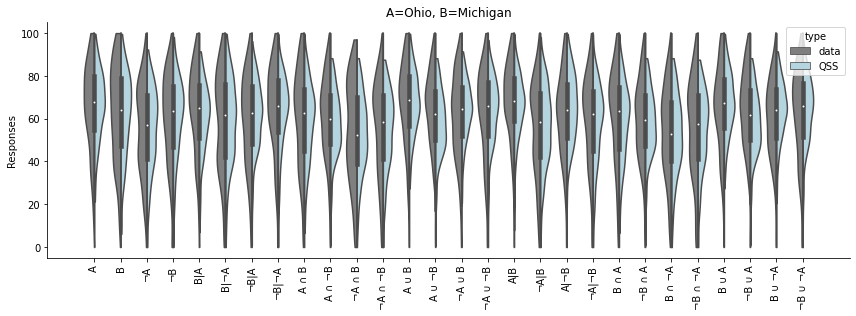

In [31]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=two_sig_tab["tab"]["A1_A2"]["QSS"], 
                        palette=["tab:grey",(173/255, 216/255, 230/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("A=Ohio, B=Michigan")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("twosig/violin_A1_A2_QSS_twosig.jpg",dpi = 500)

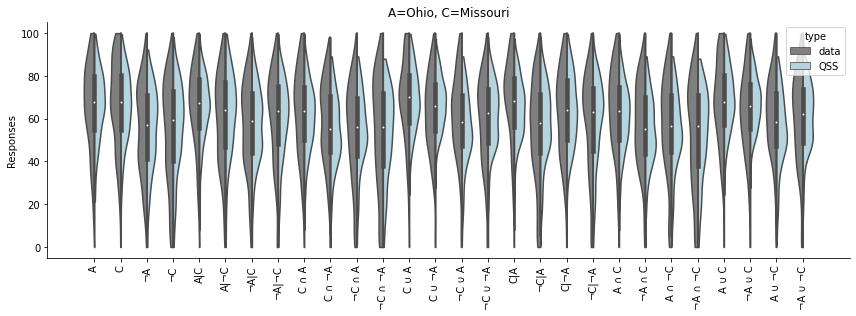

In [32]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=two_sig_tab["tab"]["A1_A3"]["QSS"], 
                        palette=["tab:grey",(173/255, 216/255, 230/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("A=Ohio, C=Missouri")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("twosig/violin_A1_A3_QSS_twosig.jpg",dpi = 500)

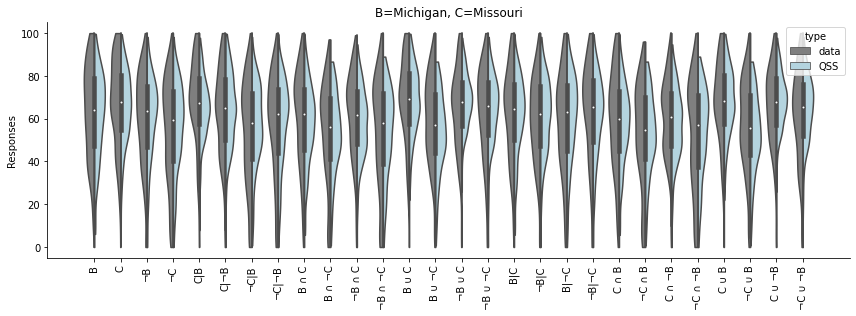

In [33]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=two_sig_tab["tab"]["A2_A3"]["QSS"], 
                        palette=["tab:grey",(173/255, 216/255, 230/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("B=Michigan, C=Missouri")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("twosig/violin_A2_A3_QSS_twosig.jpg",dpi = 500)

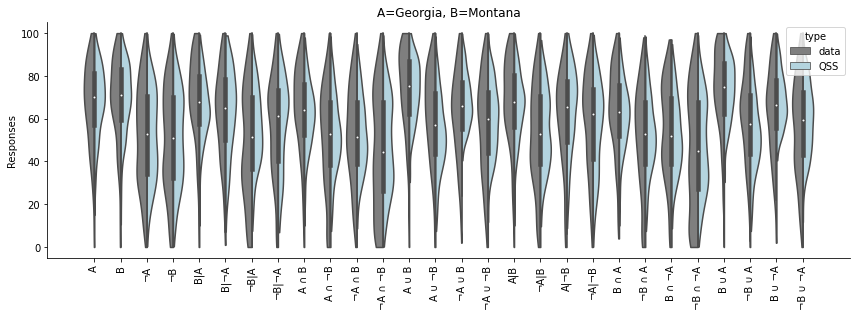

In [34]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=two_sig_tab["tab"]["B1_B2"]["QSS"], 
                        palette=["tab:grey",(173/255, 216/255, 230/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("A=Georgia, B=Montana")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("twosig/violin_B1_B2_QSS_twosig.jpg",dpi = 500)

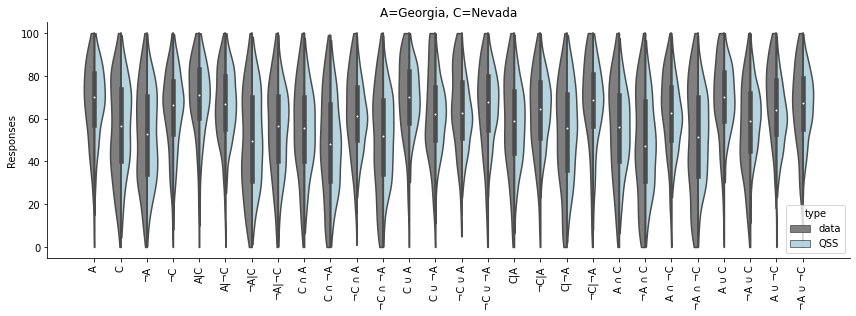

In [35]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=two_sig_tab["tab"]["B1_B3"]["QSS"], 
                        palette=["tab:grey",(173/255, 216/255, 230/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("A=Georgia, C=Nevada")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("twosig/violin_B1_B3_QSS_twosig.jpg",dpi = 500)

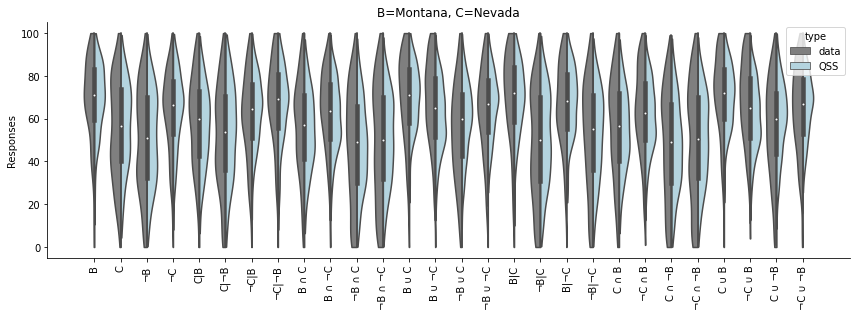

In [36]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=two_sig_tab["tab"]["B2_B3"]["QSS"], 
                        palette=["tab:grey",(173/255, 216/255, 230/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("B=Montana, C=Nevada")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("twosig/violin_B2_B3_QSS_twosig.jpg",dpi = 500)

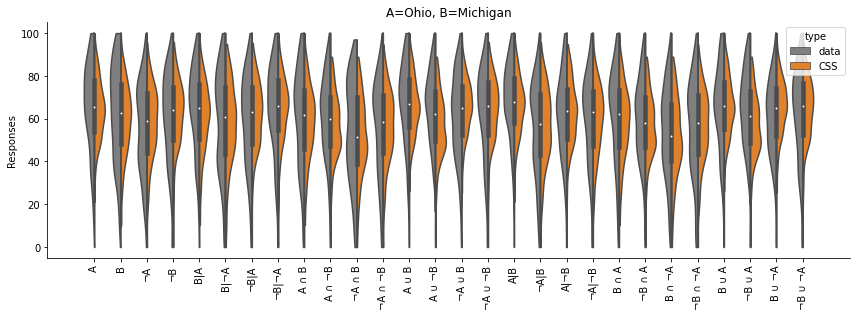

In [37]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=two_sig_tab["tab"]["A1_A2"]["CSS"], 
                        palette=["tab:grey","tab:orange"], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("A=Ohio, B=Michigan")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("twosig/violin_A1_A2_CSS_twosig.jpg",dpi = 500)

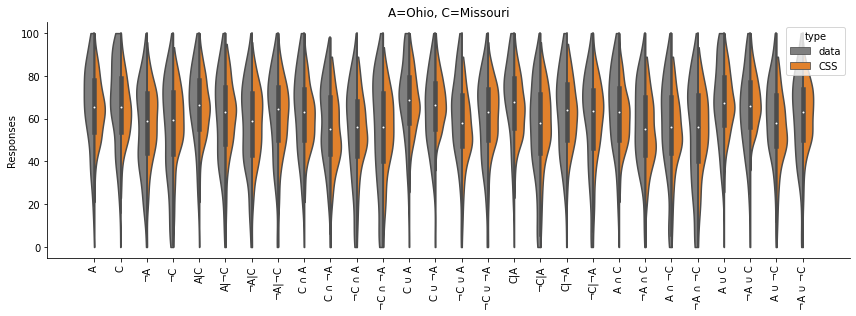

In [38]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=two_sig_tab["tab"]["A1_A3"]["CSS"], 
                        palette=["tab:grey","tab:orange"], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("A=Ohio, C=Missouri")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("twosig/violin_A1_A3_CSS_twosig.jpg",dpi = 500)

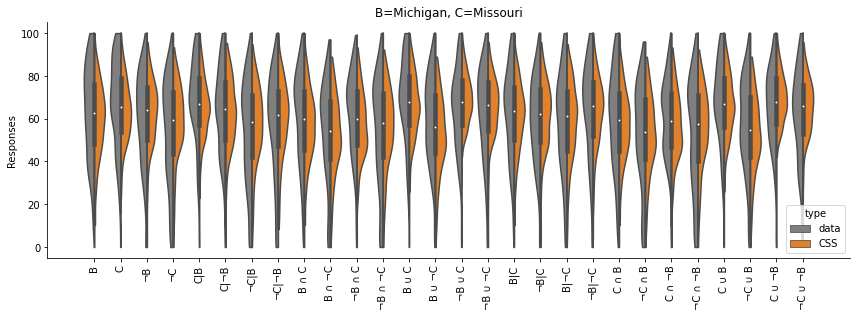

In [39]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=two_sig_tab["tab"]["A2_A3"]["CSS"], 
                        palette=["tab:grey","tab:orange"], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("B=Michigan, C=Missouri")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("twosig/violin_A2_A3_CSS_twosig.jpg",dpi = 500)

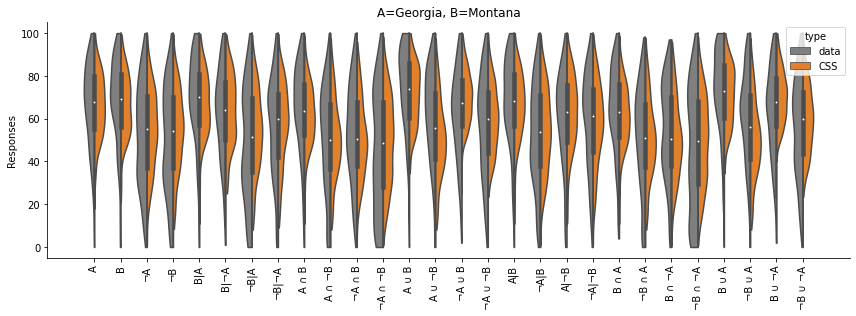

In [40]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=two_sig_tab["tab"]["B1_B2"]["CSS"], 
                        palette=["tab:grey","tab:orange"], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("A=Georgia, B=Montana")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("twosig/violin_B1_B2_CSS_twosig.jpg",dpi = 500)

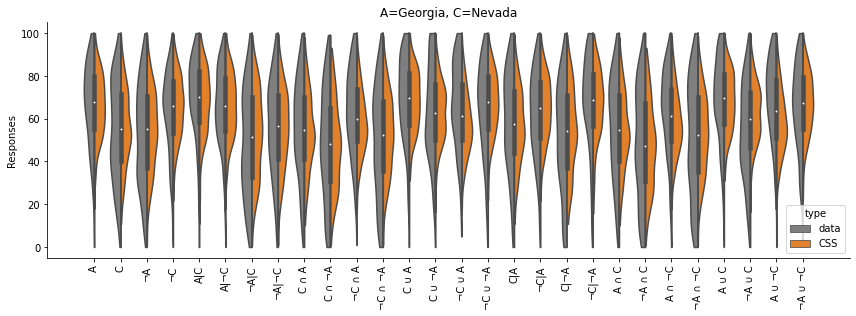

In [41]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=two_sig_tab["tab"]["B1_B3"]["CSS"], 
                        palette=["tab:grey","tab:orange"], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("A=Georgia, C=Nevada")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("twosig/violin_B1_B3_CSS_twosig.jpg",dpi = 500)

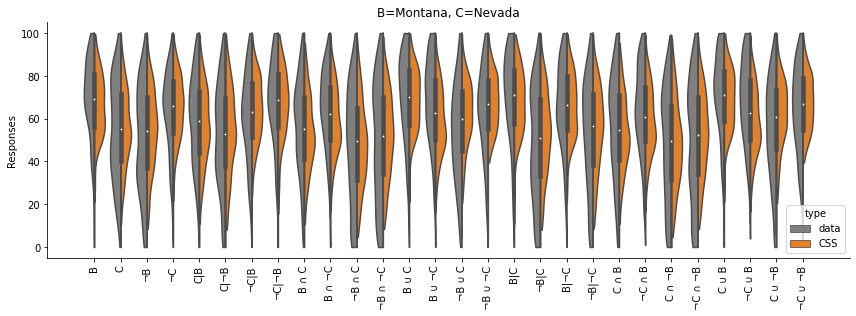

In [42]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=two_sig_tab["tab"]["B2_B3"]["CSS"], 
                        palette=["tab:grey","tab:orange"], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("B=Montana, C=Nevada")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("twosig/violin_B2_B3_CSS_twosig.jpg",dpi = 500)

## Four sigma participants

In [43]:
four_sig_p = sp.loadmat("4sig_participant.mat")['participant_list'][0: 1162,:]
four_sig_p = four_sig_p.flatten()
four_sig_p = np.subtract(four_sig_p,1) #matlab is one indexing

In [44]:
four_sig_tab = {"tab":{}}
for pair in mean_tab["pair"].unique():
    four_sig_tab["tab"][pair] = {}
    model_tab = mean_tab[mean_tab["pair"] == pair]
    for m in mean_tab["type"].unique():
        model_tab = model_tab[model_tab["subject"].isin(four_sig_p)]
        for n in mean_tab["type"].unique():
            if n != "data" and n != m:
                model_tab = model_tab[model_tab["type"] != n]
        four_sig_tab["tab"][pair][m] = model_tab
        model_tab = mean_tab[mean_tab["pair"] == pair]

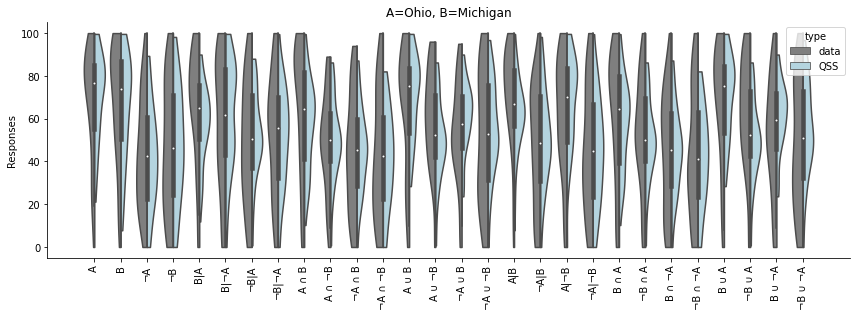

In [45]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=four_sig_tab["tab"]["A1_A2"]["QSS"], 
                        palette=["tab:grey",(173/255, 216/255, 230/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("A=Ohio, B=Michigan")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("foursig/violin_A1_A2_QSS_foursig.jpg",dpi = 500)

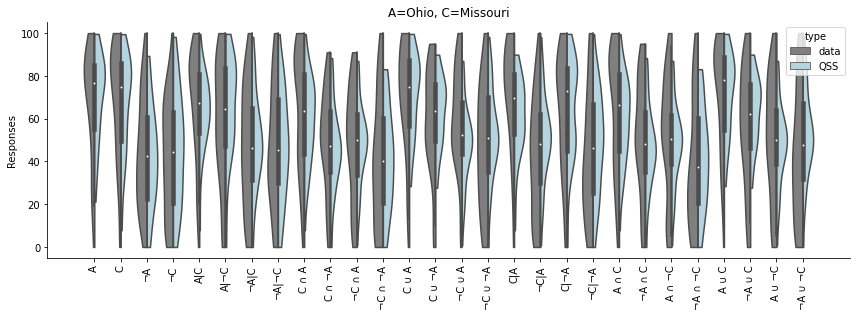

In [46]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=four_sig_tab["tab"]["A1_A3"]["QSS"], 
                        palette=["tab:grey",(173/255, 216/255, 230/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("A=Ohio, C=Missouri")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("foursig/violin_A1_A3_QSS_foursig.jpg",dpi = 500)

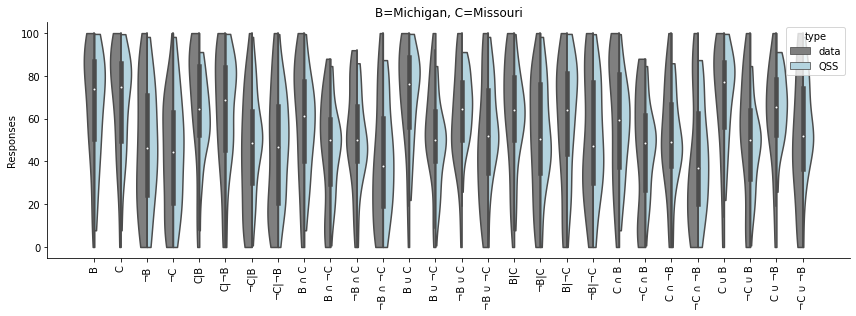

In [47]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=four_sig_tab["tab"]["A2_A3"]["QSS"], 
                        palette=["tab:grey",(173/255, 216/255, 230/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("B=Michigan, C=Missouri")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("foursig/violin_A2_A3_QSS_foursig.jpg",dpi = 500)

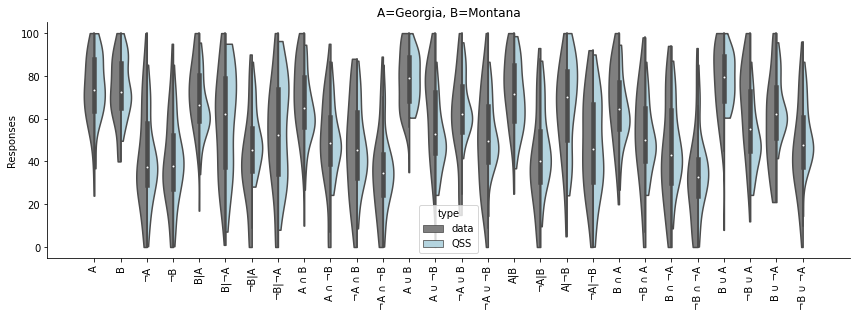

In [48]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=four_sig_tab["tab"]["B1_B2"]["QSS"], 
                        palette=["tab:grey",(173/255, 216/255, 230/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("A=Georgia, B=Montana")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("foursig/violin_B1_B2_QSS_foursig.jpg",dpi = 500)

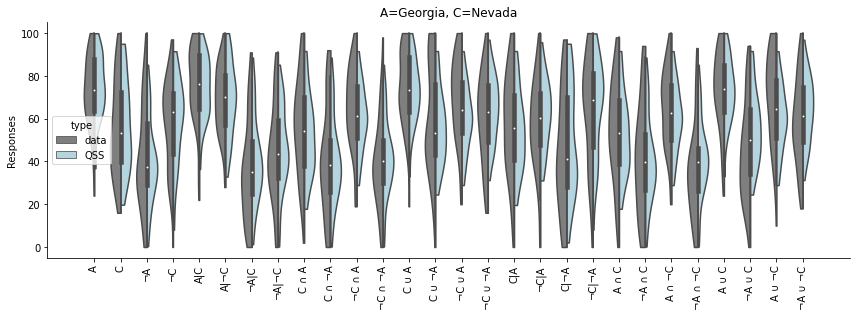

In [49]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=four_sig_tab["tab"]["B1_B3"]["QSS"], 
                        palette=["tab:grey",(173/255, 216/255, 230/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("A=Georgia, C=Nevada")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("foursig/violin_B1_B3_QSS_foursig.jpg",dpi = 500)

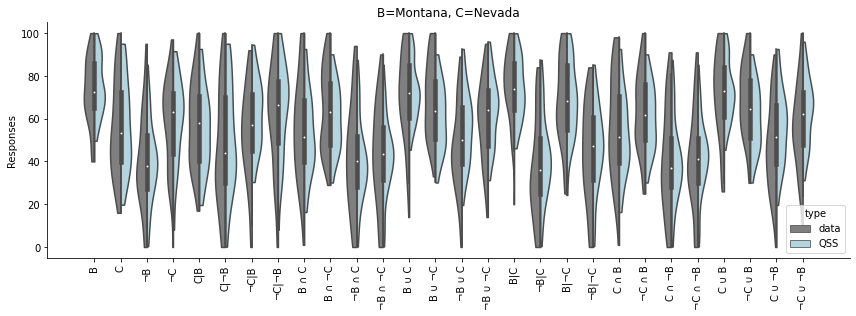

In [50]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=four_sig_tab["tab"]["B2_B3"]["QSS"], 
                        palette=["tab:grey",(173/255, 216/255, 230/255)], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("B=Montana, C=Nevada")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("foursig/violin_B2_B3_QSS_foursig.jpg",dpi = 500)

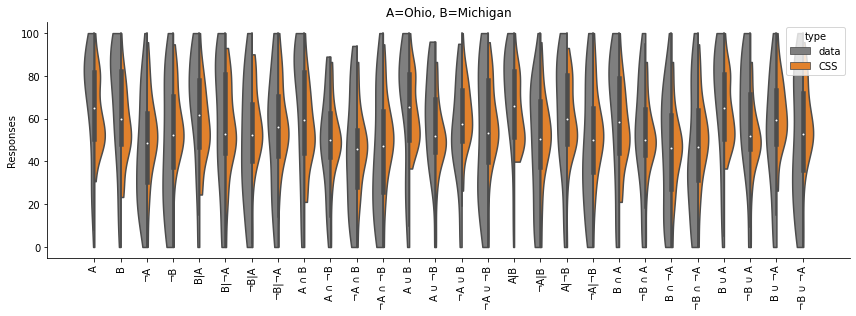

In [51]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=four_sig_tab["tab"]["A1_A2"]["CSS"], 
                        palette=["tab:grey","tab:orange"], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("A=Ohio, B=Michigan")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("foursig/violin_A1_A2_CSS_foursig.jpg",dpi = 500)

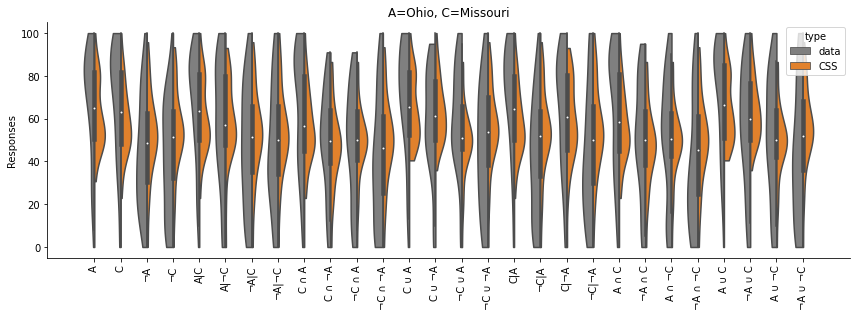

In [52]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=four_sig_tab["tab"]["A1_A3"]["CSS"], 
                        palette=["tab:grey","tab:orange"], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("A=Ohio, C=Missouri")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("foursig/violin_A1_A3_CSS_foursig.jpg",dpi = 500)

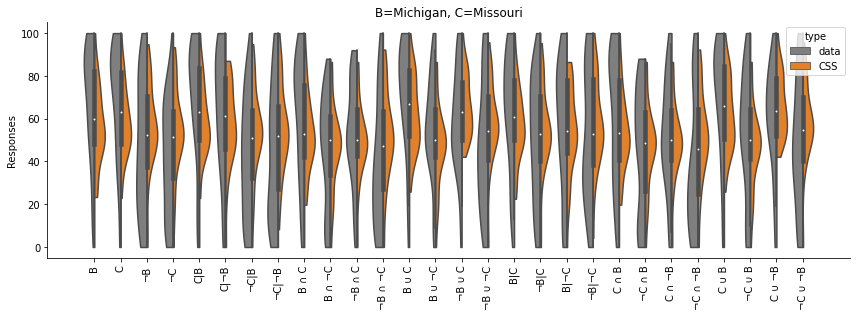

In [53]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=four_sig_tab["tab"]["A2_A3"]["CSS"], 
                        palette=["tab:grey","tab:orange"], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("B=Michigan, C=Missouri")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("foursig/violin_A2_A3_CSS_foursig.jpg",dpi = 500)

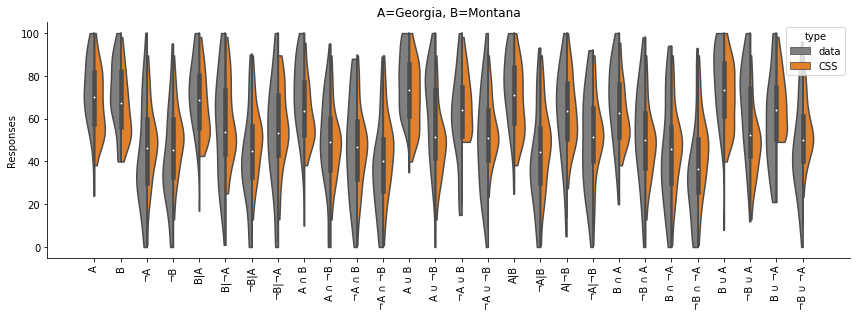

In [54]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=four_sig_tab["tab"]["B1_B2"]["CSS"], 
                        palette=["tab:grey","tab:orange"], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("A=Georgia, B=Montana")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("foursig/violin_B1_B2_CSS_foursig.jpg",dpi = 500)

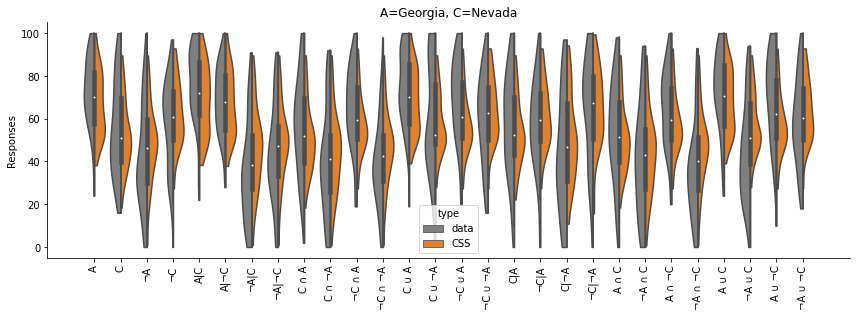

In [55]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=four_sig_tab["tab"]["B1_B3"]["CSS"], 
                        palette=["tab:grey","tab:orange"], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("A=Georgia, C=Nevada")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("foursig/violin_B1_B3_CSS_foursig.jpg",dpi = 500)

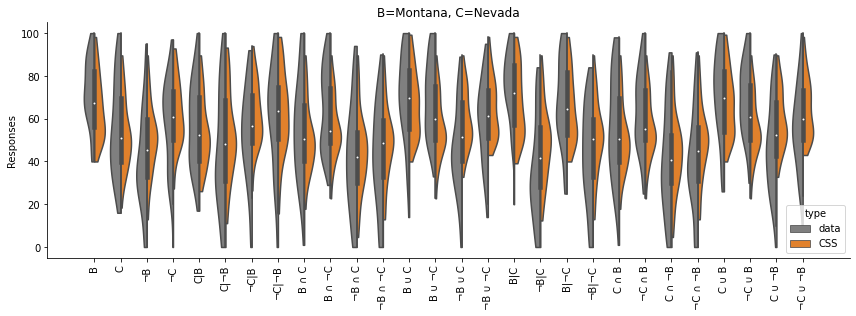

In [56]:
plt.rcParams["figure.figsize"] = (12,4.5)
sns.violinplot(x="pred", y="rating", hue="type",
                    data=four_sig_tab["tab"]["B2_B3"]["CSS"], 
                        palette=["tab:grey","tab:orange"], split=True, scale="count", cut = 0)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title("B=Montana, C=Nevada")
plt.margins(x=0.05)
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("foursig/violin_B2_B3_CSS_foursig.jpg",dpi = 500)